In [1]:
## Initialize everything

%run common.ipynb

Importing libraries...
Done!
Initialize camera and default settings...
Done!
Define functions needed to capture images...
Done!
Generating patterns for projector...
Done!


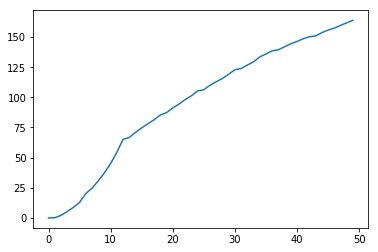

In [66]:
pixel_values = []

pixy.set_gamma(1);
pixy.set_gain(32);

for x in numpy.linspace(1,10,50):
    pixy.set_exposure(x);
    val = get_raw_image();
    val = get_raw_image();
    pixel_values += [numpy.mean(numpy.mean(val[100:150,100:150]))];
    
plt.plot(pixel_values); plt.show();

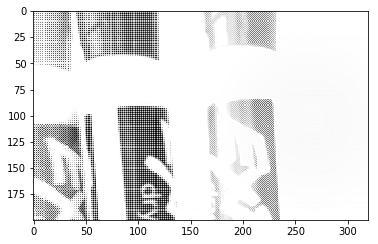

In [45]:
plt.imshow(image); plt.show();

In [36]:
A = numpy.float(image[0::2,0::2]);
B = image[0::2,1::2];
C = image[1::2,0::2];
D = image[1::2,1::2];

TypeError: only length-1 arrays can be converted to Python scalars

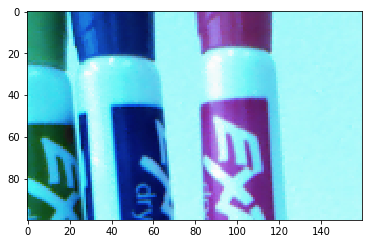

array([176, 250, 249], dtype=uint8)

In [37]:
color_image = numpy.dstack((D, (B/2+C/2), A));
plt.imshow(color_image); plt.show();
color_image[80,140,:]